In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from random import randrange
import scipy.stats as stats 

In [4]:
def rescaleFrequency(x,B_0):
    S_t = x/B_0
    y = (np.exp(-S_t))/(S_t)
    return y
def randomWiggle(x,y):
    choice = ["plus", "minus"]
    x_wiggle=x
    y_wiggle=y
    for i in range(len(x)):
        if random.choice(choice) == "plus":
            x_wiggle[i] = x[i]+0.01
            y_wiggle[i] = y[i]+0.01
        elif random.choice(choice) == "minus":
            x_wiggle[i] = x[i]-0.01
            y_wiggle[i] = y[i]-0.01
    return x_wiggle,y_wiggle
def probabilities(pool, B_0, alpha, scale,color):
    S = np.linspace(1,500,1000)
    S_adj = S/(B_0*pool)
    y = stats.gamma.pdf(S_adj, a=alpha, scale = scale)
    return plt.plot(S_adj, y,color)


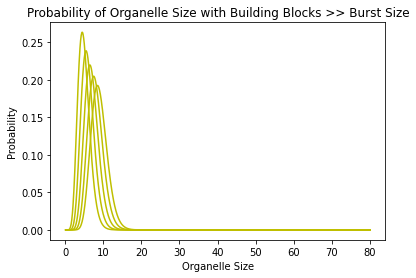

In [6]:
#Happy environment: burst-like growth, gamma probability distribution
#Note: Pool >> Burst Size
for val in range(10,20,2):  
    probabilities(50,0.125,val, scale = 0.5, color = 'y')
plt.title("Probability of Organelle Size with Building Blocks >> Burst Size")
plt.xlabel("Organelle Size")
plt.ylabel("Probability")
plt.show()

<ipython-input-4-ec19afb13e59>:3: RuntimeWarning: divide by zero encountered in true_divide
  y = (np.exp(-S_t))/(S_t)


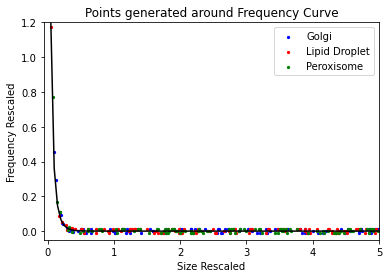

In [7]:
x = np.linspace(0,5,100)
B_0 = 0.1
y=rescaleFrequency(x,B_0)

x1 = np.random.uniform(0,5,100)
y1 = rescaleFrequency(x1,B_0)
golgi = randomWiggle(x1,y1)

x2 = np.random.uniform(0,5,100)
y2 = rescaleFrequency(x2,B_0)
lipid_droplets = randomWiggle(x2,y2)

x3 = np.random.uniform(0,5,100)
y3 = rescaleFrequency(x3,B_0)
perox = randomWiggle(x3,y3)

plt.plot(x,y,'k')
plt.scatter(golgi[0], golgi[1], 5, 'b', label = "Golgi")
plt.scatter(lipid_droplets[0], lipid_droplets[1], 5, 'r', label = "Lipid Droplet" )
plt.scatter(perox[0], perox[1], 5, 'g', label = "Peroxisome")
plt.legend()
plt.title("Points generated around Frequency Curve")
plt.xlabel("Size Rescaled")
plt.ylabel("Frequency Rescaled")
plt.axis([-0.05, 5, -0.05, 1.2])

plt.show()

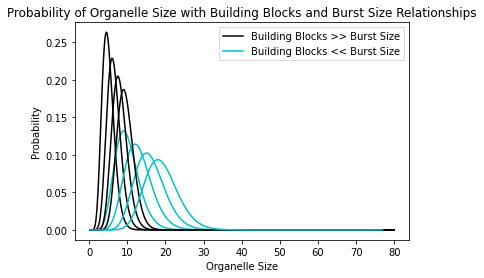

In [8]:
##Building block size << B_0
for val in range(10,20,3):  
    probabilities(50,0.125,val, scale = 0.5,color='k')
    probabilities(1.3,5,val, scale = 1,color='c')
plt.title("Probability of Organelle Size with Building Blocks and Burst Size Relationships")
plt.legend(["Building Blocks >> Burst Size","Building Blocks << Burst Size"])
plt.xlabel("Organelle Size")
plt.ylabel("Probability")
plt.show()

<ipython-input-4-ec19afb13e59>:3: RuntimeWarning: divide by zero encountered in true_divide
  y = (np.exp(-S_t))/(S_t)


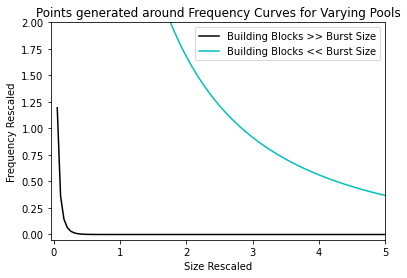

In [9]:
## x = np.linspace(0,5,100)
y=rescaleFrequency(x,B_0=0.1)
y_2=rescaleFrequency(x,B_0=5)

plt.plot(x,y, 'k', label = 'Building Blocks >> Burst Size')
plt.plot(x,y_2, 'c', label = 'Building Blocks << Burst Size')
plt.axis([-0.05, 5, -0.05, 2])
plt.title("Points generated around Frequency Curves for Varying Pools")
plt.xlabel("Size Rescaled")
plt.ylabel("Frequency Rescaled")
plt.legend()
plt.show()

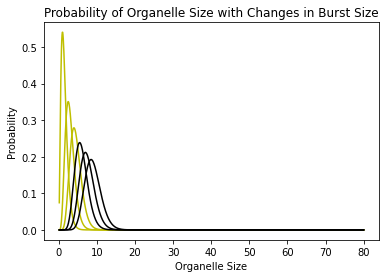

In [10]:
##Building block size >> B_0, decreased alpha
for val in range(0,20,3):  
    if val > 10:
        probabilities(50,0.125,val, scale = 0.5,color='k')
    else:
        probabilities(50,0.125,val, scale = 0.5,color='y')
plt.title("Probability of Organelle Size with Changes in Burst Size")
plt.xlabel("Organelle Size")
plt.ylabel("Probability")
plt.show()

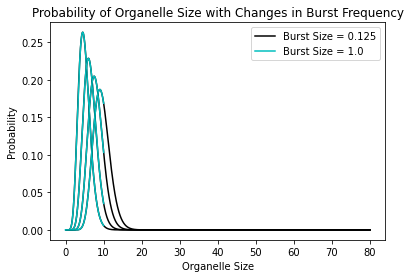

In [11]:
##Building block size >> B_0, changing B_0
for val in range(10,20,3):  
    probabilities(50,0.125,val, scale =.5,color='k')
    probabilities(50,1.0,val, scale = .5,color='c')
#plt.axis([-1,80,-0.01, 0.3])
plt.title("Probability of Organelle Size with Changes in Burst Frequency")
plt.legend(["Burst Size = 0.125","Burst Size = 1.0"])
plt.xlabel("Organelle Size")
plt.ylabel("Probability")
plt.show()